In [37]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [47]:
# load dataset
iris = load_iris()

In [39]:
df = pd.DataFrame(iris.data,columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
df

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [40]:
#为数据设置label，转化为二分类问题
df['label'] = iris.target 

In [41]:
# 提取前100条数据
data = np.array(df.iloc[0:100,[0,1,-1]])
# 得到x(特征向量)、y(分类标签)
x,y = data[:,:-1],data[:,-1]
# 将两类分类标签分别替换为1与-1，便于感知机处理
y=np.array([1 if i == 1 else -1 for i in y])

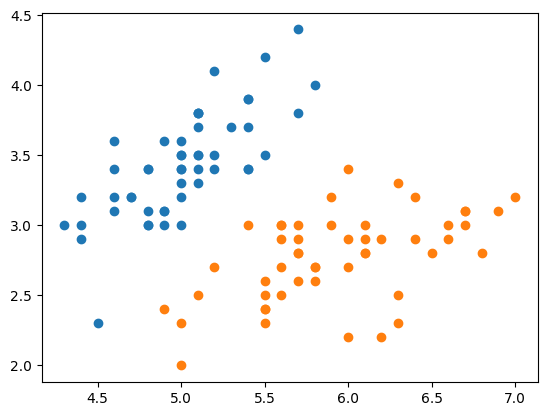

In [42]:
# 绘制散点图
plt.scatter(x[:50,0],x[:50,1],label='0')
plt.scatter(x[50:,0],x[50:,1],label='1')

In [43]:
class Model:
    def __init__(self):
        # 初始化权重，特征向量长度为2，故在初始化中故将其分别赋予1的权重
        self.w = np.ones(len(data[0])-1) 
        # 初始化偏置为0
        self.b = 0
        # 初始化学习率为0.1
        self.rate = 0.1
    
    # 定义sign函数,用于判断当前点是否分类正确
    def sign(self,x,w,b):
        y = np.dot(x,w) + b
        return y
    
    def fit(self,X_train,Y_train):
        Classfication_status = False # 用于判断当前点是否分类正确，默认不正确
        while not Classfication_status:
            wrong_count = 0 # 错误分类点计数器
            for i in range(len(X_train)): # 遍历每个点进行分类
                x = X_train[i]
                y = Y_train[i]
                if y*self.sign(x, self.w, self.b) <= 0:  # 错误分类点的判断条件
                   self.w = self.w + self.rate * np.dot(y,x) # 更新权重w
                   self.b = self.b + self.rate * y # 更新偏置b
                   wrong_count += 1 # 错误点计数器+1
            if wrong_count == 0: #当损失函数为0时，分类结束
                Classfication_status = True
        return self.w,self.b


In [44]:
# 实例化模型
perceptron = Model()
# 训练模型
w,b = perceptron.fit(x,y)

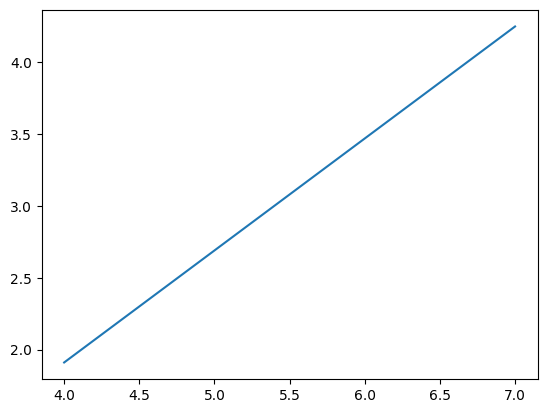

In [45]:
# 绘制分类线
x_points = np.linspace(4,7,10)
y_ = -(w[0]*x_points + b)/w[1]
plt.plot(x_points,y_)

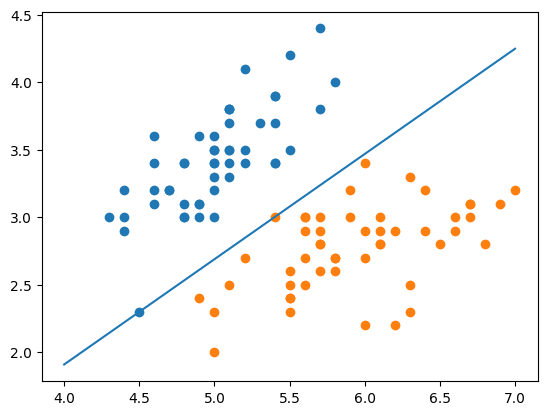

In [46]:
# 绘制散点图
plt.scatter(x[:50,0],x[:50,1],label='0')
plt.scatter(x[50:,0],x[50:,1],label='1')
plt.plot(x_points,y_)